In [1]:
!pip install inventorize3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None);
pd.set_option("display.max_rows",None);
import inventorize3 as inv 

In [3]:
df =pd.read_excel('online_retail_2010_2011.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Проверка минимальной и максимальной даты

print(df['InvoiceDate'].min(), df['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [5]:
# Очистка данных и препроцессинг

# отфильтруем ненулевые строки

df=df[df.notnull().all(axis=1)]

# преобразуем идентификатор клиента и счет-фактуру в целое число

df["Customer ID"]=df["Customer ID"].astype("int64")

# отмена фильтра

df=df[df["Invoice"].astype("str").str.get(0)!="C"]

# Рассчитываем общую стоимость

df["Revenue"]=df["Quantity"]*df["Price"]
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Отфильтруем строки, где количество проданных товаров меньше или равно нулю

df= df[df['Quantity']>0] 

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
'''
Далее мы отфильтруем наш датафрейм, чтобы он включал только данные за последние 12 полных месяцев. 
Важно, чтобы периоды были полными календарными месяцами, потому что наши расчеты будут ежемесячными, 
а частичный набор данных за месяц введет модель в заблуждение.
Извлечение заказов за 12-месячный период
'''

In [6]:
df_filtered= df[(df['InvoiceDate'] >= '2010-12-01') & \
                                   (df['InvoiceDate'] <'2011-12-01')]

# Сделаем копию датафрейма

df_filtered_=df_filtered.copy()

# Исключим ненужные столбцы

data_abc= df_filtered_[['StockCode','Description','Quantity','Revenue']]

In [7]:
# Суммируем данные по SKU (общее количество и общий доход по SKU)

summaized_data= data_abc.groupby(['StockCode','Description']).agg(Quantity=('Quantity',np.sum),Revenue=('Revenue',np.sum)).reset_index()
summaized_data.head()

,StockCode,Description,Quantity,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,823,699.55
1,10080,GROOVY CACTUS INFLATABLE,291,114.41
2,10120,DOGGY RUBBER,187,39.27
3,10125,MINI FUNKY DESIGN TAPES,1200,908.20
4,10133,COLOURING PENCILS BROWN TUBE,2384,1143.61


In [ ]:
'''
ABC-анализ — это метод, используемый в управлении запасами для классификации товаров или клиентов 
на основе их важности и для помощи в управлении ресурсами наиболее эффективным и действенным способом. 
Этот анализ включает в себя категоризацию товаров или клиентов на основе их общего дохода или объема продаж.

Класс A: Высокоприоритетные и высокоценные товары или клиенты. 
Товары или клиенты класса A составляют большой процент от общего дохода или объема продаж.

Класс B: Товары или клиенты со средним приоритетом. 
Товары или клиенты класса B составляют умеренный процент от общего дохода или объема продаж.

Класс C: Низкоприоритетные товары или клиенты. 
Товары или клиенты класса C составляют небольшой процент от общего дохода или объема продаж. 

ABC-анализ используется для помощи лицам, принимающим решения, в управлении запасами и управлении цепочкой поставок. 
Придание большей важности товарам или клиентам класса A позволяет более тщательно управлять уровнями запасов, 
сроками выполнения заказов и отношениями с клиентами. 
Товары или клиенты класса B также считаются важными, в то время как товары класса C имеют более низкий приоритет 
и управляются с меньшим вниманием.

Оптимизируя управление запасами и распределение ресурсов, ABC-анализ помогает компаниям повышать эффективность 
и принимать более обоснованные решения при ограниченных ресурсах. 
Поэтому многие предприятия и организации считают ABC-анализ незаменимым инструментом для повышения эффективности 
и оптимизации процессов принятия решений.
'''

In [8]:
# Классифицируем продукты по категориям A, B и C.

data_abc_by_volume= inv.ABC(summaized_data[['Description','Quantity']])

# Проверим классификацию по объему

data_abc_by_volume.head(5)

,Description,Quantity,Percentage,comulative,Category
2027,MEDIUM CERAMIC TOP STORAGE JAR,77729,0.02,0.02,A
2704,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53052,0.01,0.03,A
3567,JUMBO BAG RED RETROSPOT,45126,0.01,0.04,A
3573,WHITE HANGING HEART T-LIGHT HOLDER,35980,0.01,0.04,A
2809,ASSORTED COLOUR BIRD ORNAMENT,34088,0.01,0.05,A


In [9]:
# Проверим классификацию по объему

data_abc_by_volume.tail(5)

,Description,Quantity,Percentage,comulative,Category
1055,CAKE STAND LACE WHITE,1,0.00,1.00,C
63,CHERRY BLOSSOM PURSE,1,0.00,1.00,C
1038,FRYING PAN RED POLKADOT,1,0.00,1.00,C
3533,BLOSSOM IMAGES SCRAP BOOK SET,1,0.00,1.00,C
2881,JARDIN ETCHED GLASS BUTTER DISH,1,0.00,1.00,C


In [10]:
# Проверим количество категорий

data_summary= data_abc_by_volume.groupby('Category').agg(Count=('Category',np.count_nonzero),Percentage=('Percentage',np.sum)).reset_index()

data_summary['Percentage']= data_summary['Percentage']*100

data_summary

,Category,Count,Percentage
0,A,875,79.97
1,B,869,15.03
2,C,2144,5.00


Text(0.5, 1.0, 'SKUs by ABC Class')

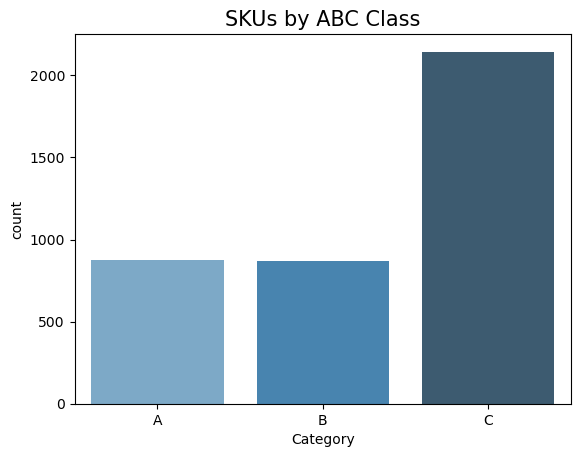

In [11]:
# Построим график для количества категорий A, B, C

sns.countplot(x='Category',data=data_abc_by_volume, palette="Blues_d")\
                .set_title("SKUs by ABC Class",fontsize=15)

Text(0.5, 1.0, 'Quantity by ABC class')

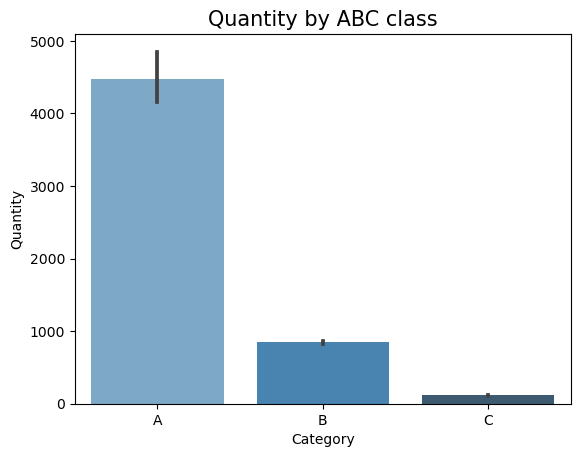

In [12]:
# Построим график объема продаж

sns.barplot(x='Category',y='Quantity',data=data_abc_by_volume,palette="Blues_d")\
                .set_title("Quantity by ABC class",fontsize=15)

In [ ]:
'''
Многокритериальный ABC-анализ
'''

In [13]:
# Добавим классификацию ABC для объема и дохода.

data_abc_by_multi_criteria= inv.productmix(summaized_data['Description'],summaized_data['Quantity'],summaized_data['Revenue'])
data_abc_by_multi_criteria['abc_rank'] = data_abc_by_multi_criteria['comulative_revenue'].rank().astype(int)
data_abc_by_multi_criteria.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,abc_rank
1245,REGENCY CAKESTAND 3 TIER,12020,138047.92,0.00,0.18,0.02,0.02,A,A,A_A,1
3573,WHITE HANGING HEART T-LIGHT HOLDER,35980,98452.36,0.01,0.04,0.01,0.03,A,A,A_A,2
3567,JUMBO BAG RED RETROSPOT,45126,83200.38,0.01,0.04,0.01,0.04,A,A,A_A,3
2027,MEDIUM CERAMIC TOP STORAGE JAR,77729,81213.22,0.02,0.02,0.01,0.05,A,A,A_A,4
3887,POSTAGE,2997,75043.96,0.00,0.61,0.01,0.06,A,A,A_A,5


In [14]:
# Проверим количество sku в каждой категории

data_abc_by_multi_criteria.product_mix.value_counts()

C_C    1801
A_A     561
B_B     403
C_B     284
A_B     272
B_C     269
B_A     197
C_A      59
A_C      42
Name: product_mix, dtype: int64

<AxesSubplot:xlabel='product_mix', ylabel='count'>

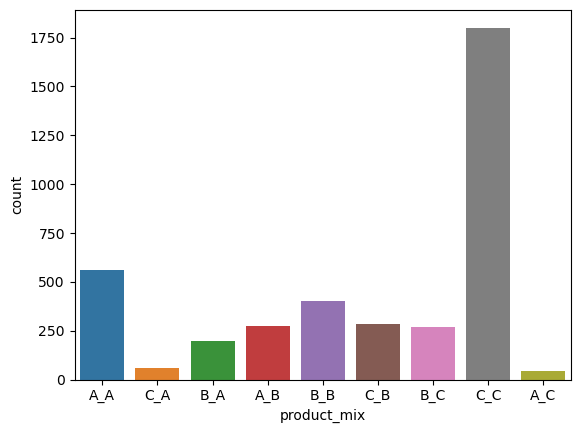

In [15]:
# Представим, сколько SKU в каждой категории.

sns.countplot(x='product_mix',data=data_abc_by_multi_criteria)

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

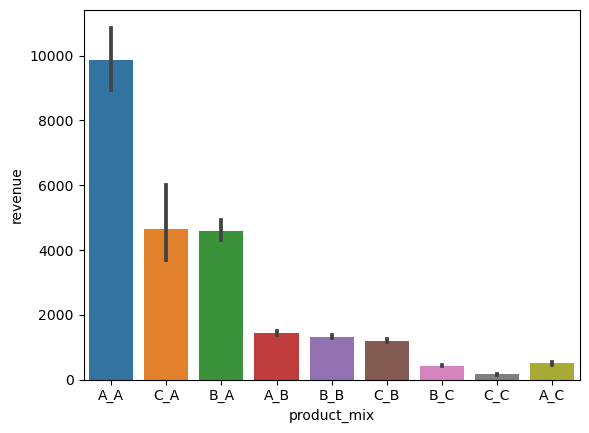

In [16]:
# Визуализируем доход, полученный каждой категорией.

sns.barplot(x='product_mix',y='revenue',data=data_abc_by_multi_criteria)

In [ ]:
'''
XYZ анализ.

Анализ XYZ — это метод классификации, который классифицирует элементы запасов по трем категориям 
на основе их регулярности спроса. 
Этот анализ оценивает регулярность спроса и предсказуемость запасов и соответственно делит запасы на три категории:

Класс X: представляет запасы с регулярным и предсказуемым спросом. 
Управление запасами для этих запасов проще, поскольку их спрос обычно демонстрирует определенную регулярность.

Класс Y: представляет запасы с нерегулярным спросом. 
Эти запасы могут сталкиваться со спросом без определенной закономерности, что делает управление запасами более сложным.

Класс Z: представляет запасы с почти случайным и непредсказуемым спросом. 
Управление запасами может быть очень сложным для этих запасов.

Анализ XYZ помогает классифицировать запасы на основе их регулярности спроса, обеспечивая более эффективное управление запасами 
и планирование запасов
'''

In [17]:
# Создаем столбец "месяц"

df_filtered = df_filtered.assign(month = pd.to_datetime(df_filtered['InvoiceDate']).dt.month )
df_filtered.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12


In [ ]:
'''
Чтобы получить быстрый обзор сезонности в наборе данных, использetv Seaborn для построения графика количества проданных единиц 
в каждом месяце в течение периода. 
Мы можем наблюдать постепенно растущую тенденцию продаж с марта по август, достигающую своего пика в августе, 
а затем переходящую в тенденцию к снижению до ноября. Можно увидеть, что она достигает своей наивысшей точки в январе.
'''

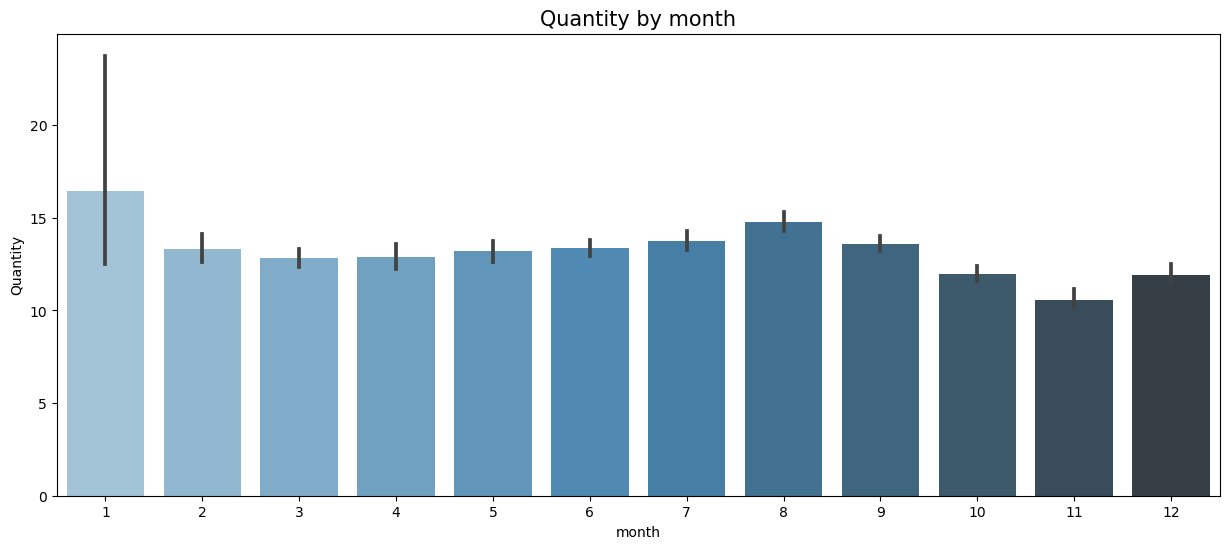

In [18]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="Quantity", 
                 data=df_filtered,
                 palette="Blues_d")\
                .set_title("Quantity by month",fontsize=15)

In [ ]:
'''
Подводя итог, можно сказать, что тенденции объема продаж и выручки не являются полностью параллельными.
'''

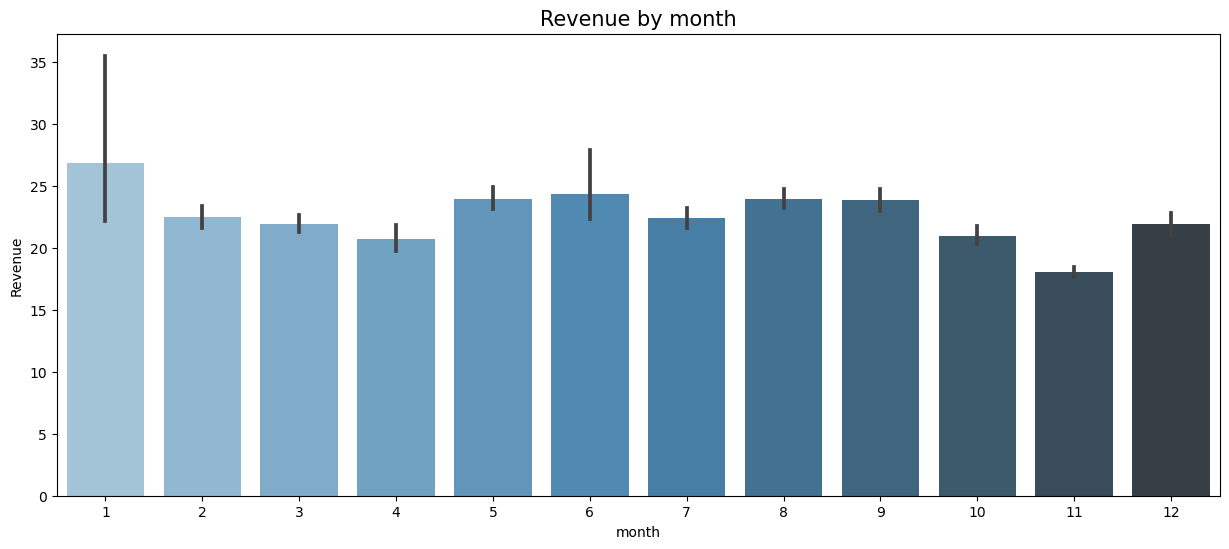

In [19]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="Revenue", 
                 data=df_filtered,
                 palette="Blues_d")\
                .set_title("Revenue by month",fontsize=15)

In [ ]:
'''
Теперь переформатируем данные так, чтобы ежемесячные данные для каждого SKU были аккуратно разделены в Pandas dataframe. 
Сначала мы сгруппируем по() столбцы sku и month и создадим dataframe на основе sum() поля quantity.
'''

In [20]:
summarized_data_by_month = df_filtered.groupby(['Description','month'])['Quantity'].sum().to_frame().reset_index()
summarized_data_by_month.head()

,Description,month,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,1,2
1,4 PURPLE FLOCK DINNER CANDLES,2,1
2,4 PURPLE FLOCK DINNER CANDLES,4,8
3,4 PURPLE FLOCK DINNER CANDLES,5,3
4,4 PURPLE FLOCK DINNER CANDLES,6,2


In [21]:
summarized_data_by_month = summarized_data_by_month.pivot(index='Description', columns='month', values='Quantity').add_prefix('month_').reset_index().fillna(0)
summarized_data_by_month.head()

month,Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,4 PURPLE FLOCK DINNER CANDLES,2.00,1.00,0.00,8.00,3.00,2.00,3.00,1.00,9.00,3.00,45.00,14.00
1,50'S CHRISTMAS GIFT BAG LARGE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,329.00,993.00,485.00,0.00
2,DOLLY GIRL BEAKER,0.00,0.00,0.00,0.00,0.00,0.00,67.00,945.00,615.00,549.00,148.00,0.00
3,I LOVE LONDON MINI BACKPACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,146.00,51.00,142.00,0.00
4,I LOVE LONDON MINI RUCKSACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [22]:
# Рассчитаем стандартное отклонение спроса

summarized_data_by_month['std_demand'] = summarized_data_by_month[["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"]].std(axis=1)
summarized_data_by_month.head()

month,Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand
0,4 PURPLE FLOCK DINNER CANDLES,2.00,1.00,0.00,8.00,3.00,2.00,3.00,1.00,9.00,3.00,45.00,14.00,12.48
1,50'S CHRISTMAS GIFT BAG LARGE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,329.00,993.00,485.00,0.00,309.06
2,DOLLY GIRL BEAKER,0.00,0.00,0.00,0.00,0.00,0.00,67.00,945.00,615.00,549.00,148.00,0.00,323.19
3,I LOVE LONDON MINI BACKPACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,146.00,51.00,142.00,0.00,56.01
4,I LOVE LONDON MINI RUCKSACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.29


In [23]:
# Рассчитаем общий спрос и среднегодовой спрос

summarized_data_by_month['total_demand'] = summarized_data_by_month.iloc[:, 1:13].sum(axis=1)
summarized_data_by_month['average_demand'] = summarized_data_by_month.iloc[:, 1:13].mean(axis=1)
summarized_data_by_month.head()

month,Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand,total_demand,average_demand
0,4 PURPLE FLOCK DINNER CANDLES,2.00,1.00,0.00,8.00,3.00,2.00,3.00,1.00,9.00,3.00,45.00,14.00,12.48,91.00,7.58
1,50'S CHRISTMAS GIFT BAG LARGE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,329.00,993.00,485.00,0.00,309.06,1831.00,152.58
2,DOLLY GIRL BEAKER,0.00,0.00,0.00,0.00,0.00,0.00,67.00,945.00,615.00,549.00,148.00,0.00,323.19,2324.00,193.67
3,I LOVE LONDON MINI BACKPACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,146.00,51.00,142.00,0.00,56.01,339.00,28.25
4,I LOVE LONDON MINI RUCKSACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.29,1.00,0.08


In [24]:
# Рассчитаем коэффициент вариации спроса

summarized_data_by_month['cov_demand'] = summarized_data_by_month['std_demand'] / summarized_data_by_month['average_demand']
summarized_data_by_month.head()

month,Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand,total_demand,average_demand,cov_demand
0,4 PURPLE FLOCK DINNER CANDLES,2.00,1.00,0.00,8.00,3.00,2.00,3.00,1.00,9.00,3.00,45.00,14.00,12.48,91.00,7.58,1.65
1,50'S CHRISTMAS GIFT BAG LARGE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,329.00,993.00,485.00,0.00,309.06,1831.00,152.58,2.03
2,DOLLY GIRL BEAKER,0.00,0.00,0.00,0.00,0.00,0.00,67.00,945.00,615.00,549.00,148.00,0.00,323.19,2324.00,193.67,1.67
3,I LOVE LONDON MINI BACKPACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,146.00,51.00,142.00,0.00,56.01,339.00,28.25,1.98
4,I LOVE LONDON MINI RUCKSACK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.29,1.00,0.08,3.46


In [25]:
summarized_data_by_month.sort_values(by='cov_demand', ascending=False).head(5)

month,Description,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,std_demand,total_demand,average_demand,cov_demand
2370,PEG BAG APPLE DESIGN,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.87,100.00,8.33,3.46
1259,FLOWERS HANDBAG blue and orange,0.00,0.00,0.00,0.00,49.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.15,49.00,4.08,3.46
2588,POP ART PUSH DOWN RUBBER,0.00,0.00,0.00,0.00,0.00,98.00,0.00,0.00,0.00,0.00,0.00,0.00,28.29,98.00,8.17,3.46
1937,LUNCH BAG RED SPOTTY,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,200.00,16.67,3.46
1647,HOME SWEEET HOME 3 PEG HANGER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.00,0.00,0.00,7.22,25.00,2.08,3.46


In [26]:
# Выведем минимальное, максимальное и среднее значения 'cov_demand'

print(summarized_data_by_month['cov_demand'].min(), summarized_data_by_month['cov_demand'].max(),summarized_data_by_month['cov_demand'].mean())

0.15001830723469195 3.464101615137756 1.6007822421911828


In [ ]:
'''
Значения min(), mean() и max() показывают, что наименьшее значение CV составляет 0,15, наибольшее — 3,46, 
а общее среднее значение — 1,60. 
Это означает, что этот набор данных включает в себя множество продуктов с колеблющимся или сезонным спросом, 
что значительно усложнит задачу по контролю со стороны сотрудников отдела закупок.

Вот распределение CV по ассортименту продукции. 
Учитывая, что товары с CV более 1 гораздо сложнее предсказать из-за колебаний спроса, этот конкретный запас 
может быть относительно сложным для поддержания в хорошем состоянии, 
если только компания не имеет дорогостоящих уровней буферного запаса.
'''

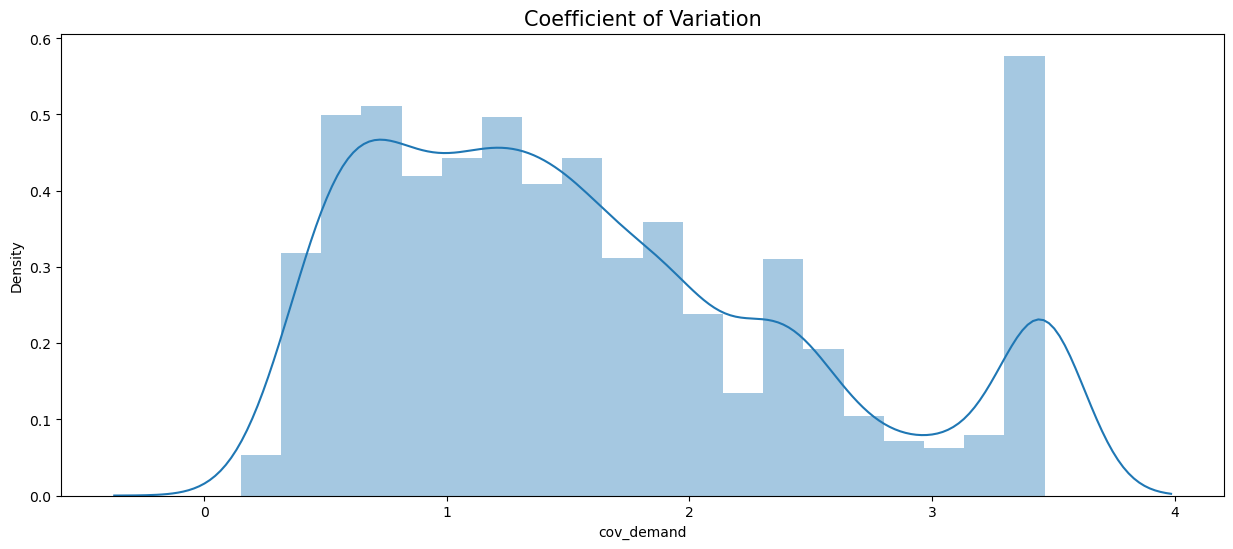

In [27]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(summarized_data_by_month['cov_demand']).set_title("Coefficient of Variation",fontsize=15)

In [ ]:
'''
Назначим классы XYZ
Как и в случае с анализом запасов ABC, вы можете выбирать собственные параметры для обозначения SKU в классах XYZ. 
Однако наиболее распространенным подходом является использование коэффициента вариации в качестве руководства. 
Товары с CV 0,5 или ниже очень предсказуемы и имеют стабильные продажи в течение всего года, поэтому они относятся к классу X. 
Товары с CV от 0,5 до 1,0 менее предсказуемы и ими сложнее управлять, поэтому они относятся к классу Y. 
Наконец, все с CV более 1 относится к классу Z, так как его гораздо сложнее прогнозировать и он подвержен колебаниям 
в течение года, часто потому, что он продается только спорадически.

Мы создадим функцию, которая возьмет значение cov_demand из нашего фреймворка данных, а затем назначит соответствующий класс 
на основе правил коэффициента вариации XYZ, которые мы определили выше. 
Если вы используете value_counts(), вы получите краткую сводку по количеству SKU в каждом классе. 
Как видно из графика выше, в высоко предсказуемом классе X их всего 276, в менее предсказуемом классе Y — 920, 
а в классе Z — трудноуправляемые 2672.
'''

In [28]:
def xyz_classify_product(cov):
    '''
    Применить классификацию XYZ к каждому продукту на основе
    его коэффициента вариации в объеме заказа.

    :param cov: Коэффициент вариации в объеме заказа для SKU
    :return: Класс классификации запасов XYZ
    '''

    if cov <= 0.5:
        return 'X'
    elif cov > 0.5 and cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [29]:
summarized_data_by_month['xyz_class'] = summarized_data_by_month['cov_demand'].apply(xyz_classify_product)
summarized_data_by_month.xyz_class.value_counts()

Z    2672
Y     920
X     276
Name: xyz_class, dtype: int64

In [30]:
summarized_data_by_month.groupby('xyz_class').agg(
    total_skus=('Description', 'nunique'),
    total_demand=('total_demand', 'sum'),    
    std_demand=('std_demand', 'mean'),      
    avg_demand=('average_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean'),
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,276,1192039.00,138.50,359.92,0.41
Y,920,1853654.00,115.50,167.90,0.74
Z,2672,1848590.00,95.83,57.65,2.02


In [31]:
df_monthly = summarized_data_by_month.groupby('xyz_class').agg(
    month_1=('month_1', 'sum'),
    month_2=('month_2', 'sum'),
    month_3=('month_3', 'sum'),
    month_4=('month_4', 'sum'),
    month_5=('month_5', 'sum'),
    month_6=('month_6', 'sum'),
    month_7=('month_7', 'sum'),
    month_8=('month_8', 'sum'),
    month_9=('month_9', 'sum'),
    month_10=('month_10', 'sum'),
    month_11=('month_11', 'sum'),
    month_12=('month_12', 'sum'),
)
df_monthly.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
xyz_class,,,,,,,,,,,,
X,87697.00,85663.00,120939.00,83228.00,107723.00,99659.00,91359.00,104804.00,114026.00,102332.00,113784.00,80825.00
Y,113894.00,117029.00,155690.00,141848.00,174085.00,156796.00,153048.00,158294.00,184535.00,180050.00,200524.00,117861.00
Z,147556.00,62946.00,71915.00,67149.00,91877.00,107244.00,125025.00,135840.00,246338.00,311526.00,367580.00,113594.00


In [ ]:
'''
Для построения графика нам необходимо преобразовать данные из широкого формата в длинный формат, 
поэтому мы воспользуемся функцией unstack() для создания длинного кадра данных, 
затем сбросим индекс и переименуем столбцы в соответствии с базовыми данными.
'''

In [32]:
df_monthly_unstacked = df_monthly.unstack('xyz_class').to_frame()
df_monthly_unstacked = df_monthly_unstacked.reset_index().rename(columns={'level_0': 'month', 0: 'demand'})
df_monthly_unstacked.head()

,month,xyz_class,demand
0,month_1,X,87697.00
1,month_1,Y,113894.00
2,month_1,Z,147556.00
3,month_2,X,85663.00
4,month_2,Y,117029.00


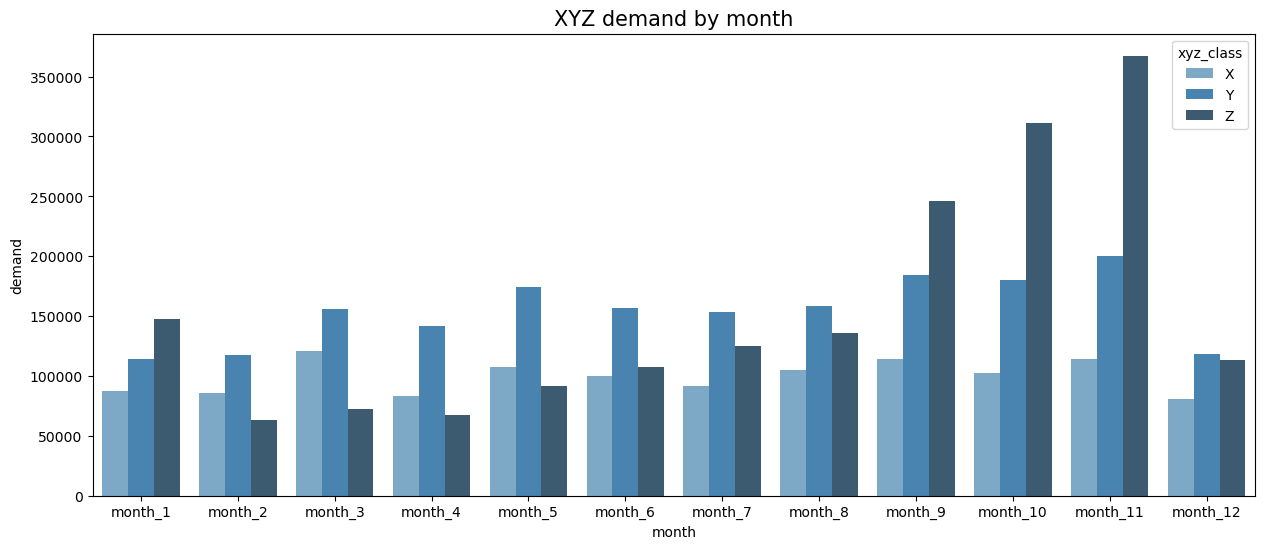

In [33]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="month", 
                 y="demand", 
                 hue="xyz_class", 
                 data=df_monthly_unstacked,
                 palette="Blues_d")\
                .set_title("XYZ demand by month",fontsize=15)

In [ ]:
'''
Как показано на графике, категория продуктов «x» демонстрирует минимальные ежемесячные колебания, 
тогда как категория «y» испытывает более изменчивые ежемесячные изменения. 
С другой стороны, фиксация флуктуационных изменений в категории «z» оказывается более сложной задачей.

Создание класса ABC-XYZ Теперь, когда все данные собраны в одном месте, мы можем создать обозначения классов ABC-XYZ, 
объединив строковое значение abc_class с xyz_class. 
Затем мы создадим новый фрейм данных сводной статистики, сгруппировав по новому abc_xyz_class и рассчитав количество SKU, 
объем спроса, средний спрос и общий доход по классу.
'''

In [34]:
# Объединим abc и xyz категории

df_abc_xyz = data_abc_by_multi_criteria.merge(summarized_data_by_month[['Description','std_demand','total_demand','average_demand','cov_demand','xyz_class']], left_on='skus',right_on='Description',how='left')
df_abc_xyz.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,abc_rank,Description,std_demand,total_demand,average_demand,cov_demand,xyz_class
0,REGENCY CAKESTAND 3 TIER,12020,138047.92,0.00,0.18,0.02,0.02,A,A,A_A,1,REGENCY CAKESTAND 3 TIER,248.38,12020.00,1001.67,0.25,X
1,WHITE HANGING HEART T-LIGHT HOLDER,35980,98452.36,0.01,0.04,0.01,0.03,A,A,A_A,2,WHITE HANGING HEART T-LIGHT HOLDER,1302.89,35980.00,2998.33,0.43,X
2,JUMBO BAG RED RETROSPOT,45126,83200.38,0.01,0.04,0.01,0.04,A,A,A_A,3,JUMBO BAG RED RETROSPOT,1267.38,45126.00,3760.50,0.34,X
3,MEDIUM CERAMIC TOP STORAGE JAR,77729,81213.22,0.02,0.02,0.01,0.05,A,A,A_A,4,MEDIUM CERAMIC TOP STORAGE JAR,21333.74,77729.00,6477.42,3.29,Z
4,POSTAGE,2997,75043.96,0.00,0.61,0.01,0.06,A,A,A_A,5,POSTAGE,84.51,2997.00,249.75,0.34,X


In [35]:
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['revenue_category'].astype(str) + df_abc_xyz['xyz_class'].astype(str)

df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(
    total_skus=('skus', 'nunique'),
    total_demand=('total_demand', sum),
    average_demand=('average_demand', 'mean'),    
    total_revenue=('revenue', sum),    
).reset_index()

df_abc_xyz_summary.sort_values(by='total_revenue', ascending=False)

,abc_xyz_class,total_skus,total_demand,average_demand,total_revenue
1,AY,329,1309821.00,331.77,2793221.44
2,AZ,310,913363.00,245.53,2112011.00
0,AX,178,1061301.00,496.86,1807626.03
5,BZ,552,593963.00,89.67,709705.88
4,BY,327,429364.00,109.09,439586.31
8,CZ,1812,346515.00,15.84,312053.77
3,BX,79,118441.00,124.94,110722.70
7,CY,264,120826.00,37.29,99272.52
6,CX,19,12297.00,53.93,9015.46


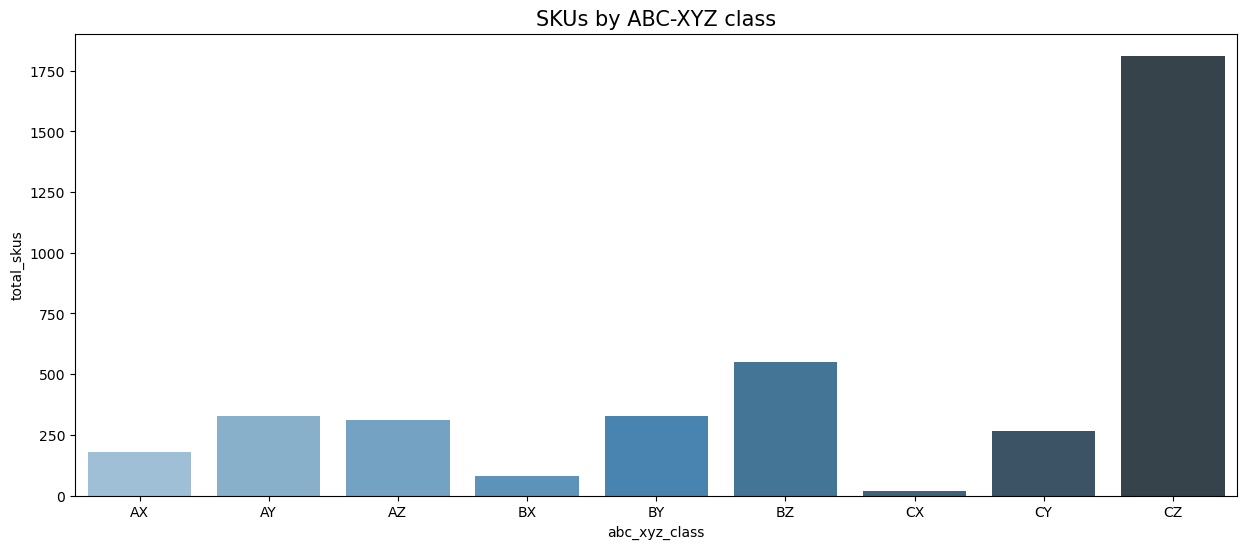

In [36]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_skus", 
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)

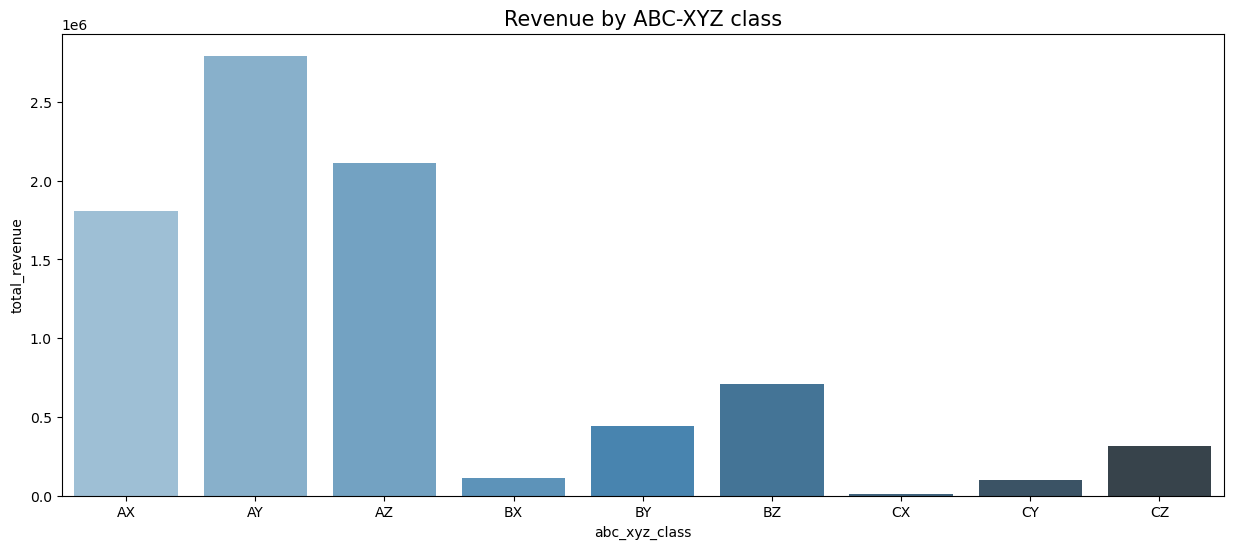

In [37]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_revenue", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Revenue by ABC-XYZ class",fontsize=15)

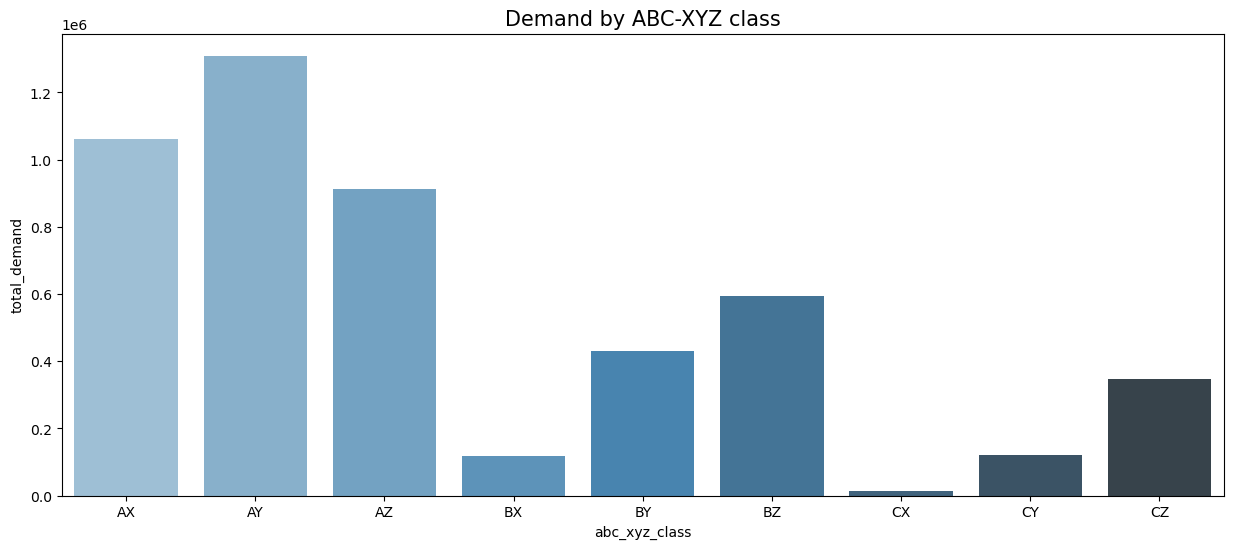

In [38]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class", 
                 y="total_demand", 
                 data=df_abc_xyz_summary, 
                 palette="Blues_d")\
                .set_title("Demand by ABC-XYZ class",fontsize=15)

In [ ]:
'''
Понимание классов ABC XYZ
Объединяя данные ABC и XYZ, мы генерируем девять различных классов. 
Все классы с префиксом A приносят высокие суммы дохода, классы B приносят средний доход, а классы C приносят низкий доход.

Аналогично, классы с суффиксом X имеют устойчивый спрос, их легко прогнозировать и управлять. 
Классы с суффиксом Y имеют переменный, но предсказуемый спрос, поэтому ими сложнее управлять, чем классами X, 
но все равно легко выполнимо. 
Классы Z самые сложные из всех. 
Они продаются спорадически и в разных объемах, поэтому их сложнее прогнозировать и сложнее управлять.
'''